In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('./data/rtt_throughput (6).csv')

df

,rtt,throughput
0,41.00,22.60992
1,41.75,25.21088
2,44.00,19.99872
3,6.00,11.71456
4,6.00,15.19616
...,...,...
438,45.00,8.27392
439,42.00,0.19456
440,42.00,27.79136
441,42.00,11.61216


Text(0.5, 1.0, 'RTT vs Throughput')

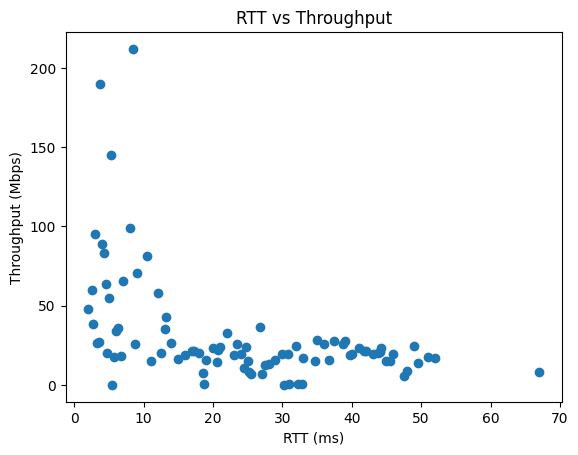

In [19]:
agged = df.groupby('rtt').mean()

plt.scatter(agged.index, agged['throughput'])
plt.xlabel('RTT (ms)')
plt.ylabel('Throughput (Mbps)')
plt.title('RTT vs Throughput')

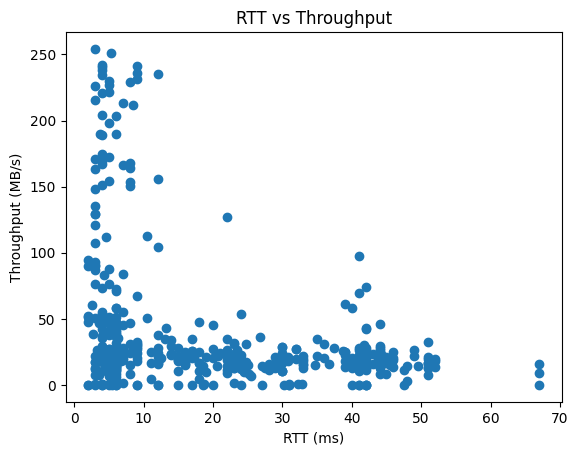

In [15]:
# graph rtt vs throughput

plt.scatter(df['rtt'], df['throughput'])

plt.xlabel('RTT (ms)')
plt.ylabel('Throughput (MB/s)')
plt.title('RTT vs Throughput')
plt.show()
